<a href="https://colab.research.google.com/github/pei0217/fin_hw5_week9/blob/main/fin_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0693
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0046
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0036
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0038
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0028
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0028
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0024
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0020
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0029
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


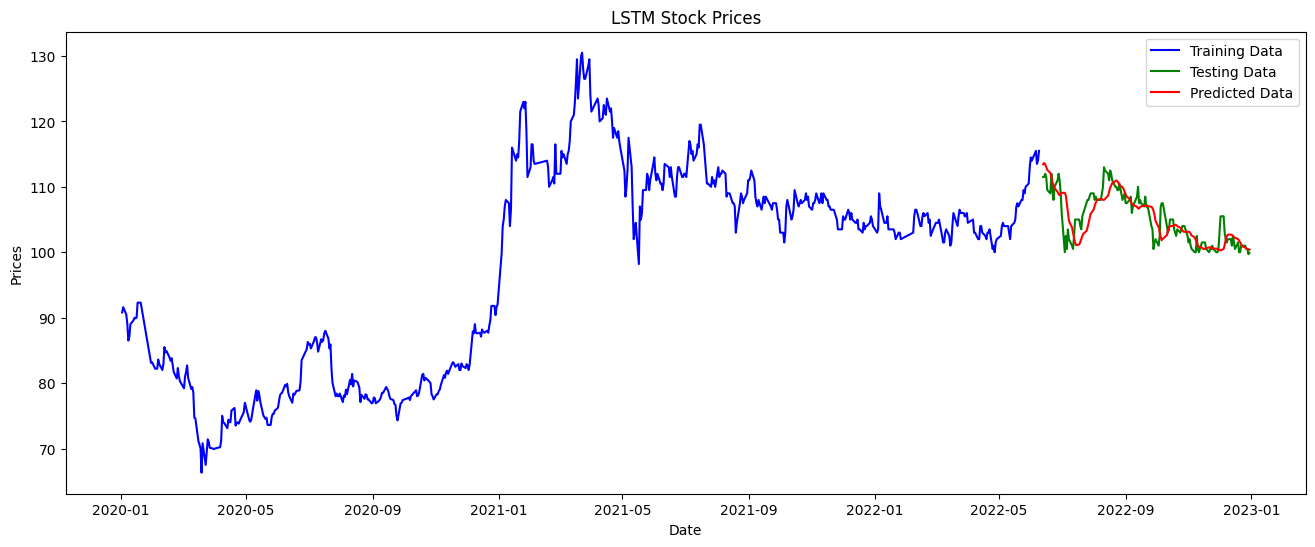

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 抓取股票歷史資料
ticker = "2317.TW"  # 更換為您的股票代碼
df = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# 選擇收盤價進行預測
df = df[['Close']]
df.dropna(inplace=True)

# 資料標準化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# 建立輸入序列 (X) 和輸出值 (y)
def create_dataset(dataset, time_step=20):  # 改為20天
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])  # 過去 time_step 天的資料
        y.append(dataset[i + time_step, 0])    # 第 time_step+1 天的資料
    return np.array(X), np.array(y)

time_step = 20  # 修改為20天
X, y = create_dataset(scaled_data, time_step)

# 資料切分
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 調整資料形狀為 [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 建立 LSTM 模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)

# 預測
predicted_stock_price_lstm = model.predict(X_test)
predicted_stock_price_lstm = scaler.inverse_transform(predicted_stock_price_lstm)
import matplotlib.pyplot as plt
# 切分訓練集和測試集的視覺化資料
train_data = df[:train_size + time_step]
test_data = df[train_size + time_step + 1:].copy()  # 從 test_data 的第二個點開始

# 增加一列「Predicted」數據
test_data['Predicted'] = predicted_stock_price_lstm

# 繪製結果
plt.figure(figsize=(16,6))
plt.plot(train_data['Close'], color='blue', label='Training Data')
plt.plot(test_data['Close'], color='green', label='Testing Data')
plt.plot(test_data['Predicted'], color='red', label='Predicted Data')
plt.title('LSTM Stock Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/50, Loss: 0.454705124392229
Epoch 2/50, Loss: 0.10465329096597784
Epoch 3/50, Loss: 0.0836133595336886
Epoch 4/50, Loss: 0.0689291465370094
Epoch 5/50, Loss: 0.07230059298522332
Epoch 6/50, Loss: 0.056982300079920715
Epoch 7/50, Loss: 0.03075309470295906
Epoch 8/50, Loss: 0.020267846062779427
Epoch 9/50, Loss: 0.015347489950192325
Epoch 10/50, Loss: 0.018797805697164115
Epoch 11/50, Loss: 0.014372531324625015
Epoch 12/50, Loss: 0.012973371893167496
Epoch 13/50, Loss: 0.013505506384022096
Epoch 14/50, Loss: 0.011999662253348267
Epoch 15/50, Loss: 0.011545483433805844
Epoch 16/50, Loss: 0.009680067627307247
Epoch 17/50, Loss: 0.008630790309432675
Epoch 18/50, Loss: 0.00882853044416098
Epoch 19/50, Loss: 0.008855668553972946
Epoch 20/50, Loss: 0.007793701089480344
Epoch 21/50, Loss: 0.006739674656487563
Epoch 22/50, Loss: 0.007303830784033327
Epoch 23/50, Loss: 0.00671530030119945
Epoch 24/50, Loss: 0.0073618132429307
Epoch 25/50, Loss: 0.005728861399214058
Epoch 26/50, Loss: 0.00

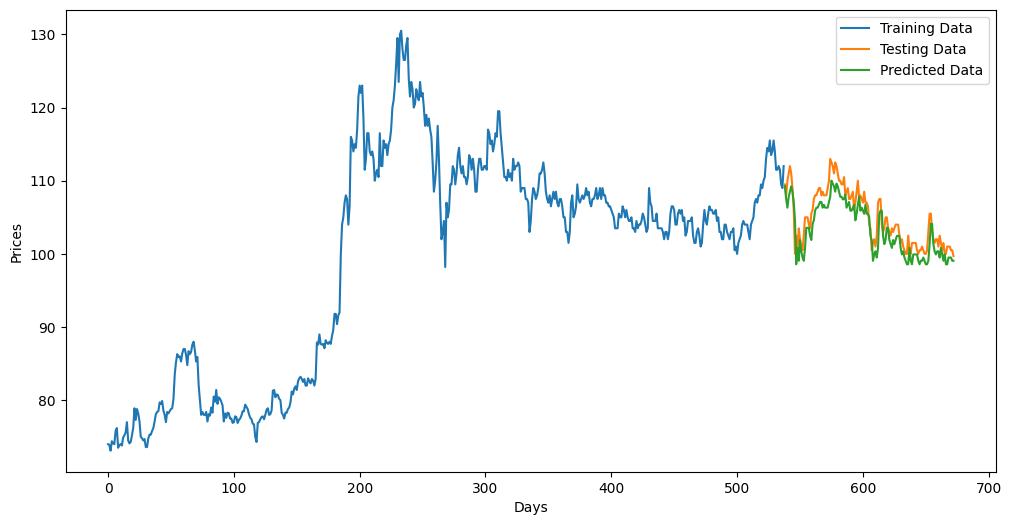

In [32]:
import numpy as np
import pandas as pd
import yfinance as yf
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

# Fetching the stock data for the specified ticker symbol
ticker = "2317.TW"  # Ticker symbol for the stock
df = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Selecting the 'Close' column for the prediction task
df = df[['Close']]
df.dropna(inplace=True)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Creating the dataset with the specified time window (e.g., 60 days)
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # Input sequence for time window
        X.append(a)
        y.append(dataset[i + time_step, 0])  # Target value
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Splitting data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshaping data for PyTorch model input
X_train = X_train.reshape(X_train.shape[0], time_step, 1)
X_test = X_test.reshape(X_test.shape[0], time_step, 1)

class TransformerModel(nn.Module):
    def __init__(self, input_dim=1, d_model=64, nhead=4, num_encoder_layers=3, num_decoder_layers=3, dim_feedforward=128, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.d_model = d_model

        # Linear layer to match the input dimension with the model's dimension
        self.linear_in = nn.Linear(input_dim, d_model)

        # Positional encoding layer
        self.positional_encoding = nn.Parameter(torch.zeros(1, time_step, d_model))

        # Transformer layers
        self.transformer = nn.Transformer(d_model=d_model, nhead=nhead, num_encoder_layers=num_encoder_layers,
                                          num_decoder_layers=num_decoder_layers, dim_feedforward=dim_feedforward,
                                          dropout=dropout)

        # Linear layer to project the output back to the original dimension
        self.linear_out = nn.Linear(d_model, 1)

    def forward(self, src):
        # Applying the input linear transformation
        src = self.linear_in(src) * np.sqrt(self.d_model)

        # Adding positional encoding
        src = src + self.positional_encoding[:, :src.size(1), :]

        # Passing through the Transformer
        transformer_output = self.transformer(src, src)

        # Projecting the output back to the single dimension
        output = self.linear_out(transformer_output)

        # Only the last time step is used for prediction
        return output[:, -1, :]

# Converting data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Creating data loaders
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Defining model, loss function, and optimizer
model = TransformerModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}")

# Putting the model in evaluation mode
model.eval()
with torch.no_grad():
    train_pred = model(X_train_tensor).squeeze().numpy()
    test_pred = model(X_test_tensor).squeeze().numpy()

# Inverting the scaling
train_pred = scaler.inverse_transform(train_pred.reshape(-1, 1))
test_pred = scaler.inverse_transform(test_pred.reshape(-1, 1))
y_train_orig = scaler.inverse_transform(y_train_tensor.numpy())
y_test_orig = scaler.inverse_transform(y_test_tensor.numpy())

# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train_orig)), y_train_orig, label="Training Data")
plt.plot(np.arange(len(y_train_orig), len(y_train_orig) + len(y_test_orig)), y_test_orig, label="Testing Data")
plt.plot(np.arange(len(y_train_orig), len(y_train_orig) + len(test_pred)), test_pred, label="Predicted Data")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

